In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow statsmodels 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\chinm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from matplotlib import style
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
data = pd.read_csv("CEEW - Smart meter data Bareilly 2020.csv")
print("="*50)
print("First Five Rows ","\n")
print(data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(data.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(data.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(data.isnull().sum(),"\n")

First Five Rows  

           x_Timestamp  t_kWh  z_Avg Voltage (Volt)  z_Avg Current (Amp)  \
0  2020-01-01 00:00:00  0.002                251.26                 0.15   
1  2020-01-01 00:03:00  0.001                251.23                 0.15   
2  2020-01-01 00:06:00  0.001                251.55                 0.14   
3  2020-01-01 00:09:00  0.001                251.97                 0.14   
4  2020-01-01 00:12:00  0.002                252.03                 0.14   

   y_Freq (Hz) meter  
0        49.97  BR02  
1        49.94  BR02  
2        49.94  BR02  
3        50.09  BR02  
4        50.08  BR02   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627360 entries, 0 to 6627359
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   x_Timestamp           object 
 1   t_kWh                 float64
 2   z_Avg Voltage (Volt)  float64
 3   z_Avg Current (Amp)   float64
 4   y_Freq (Hz)           float64

In [5]:
data['x_Timestamp'] = pd.to_datetime(data['x_Timestamp'])

In [6]:
data.drop(columns=['z_Avg Voltage (Volt)', 'z_Avg Current (Amp)', 'y_Freq (Hz)','meter'], inplace=True)

In [7]:
print(len(data))

6627360


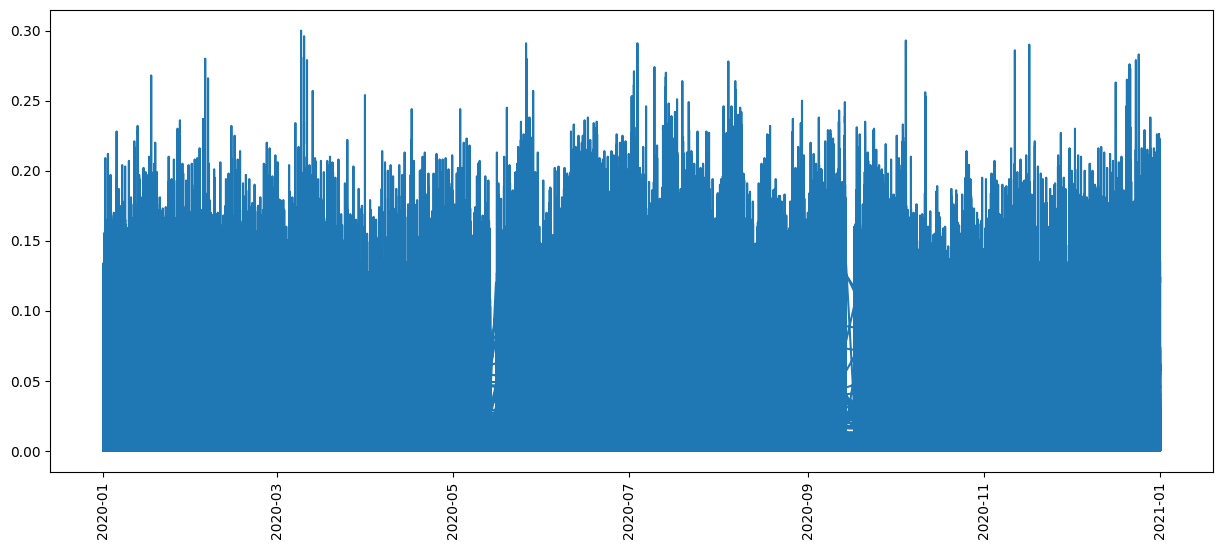

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['x_Timestamp'],data['t_kWh'])
plt.xticks(rotation='vertical')
plt.show()

In [9]:
df_prophet = data[['x_Timestamp', 't_kWh']]
df_prophet.rename(columns={'x_Timestamp': 'ds', 't_kWh': 'y'}, inplace=True)

In [10]:
df_prophet

,ds,y
0,2020-01-01 00:00:00,0.002
1,2020-01-01 00:03:00,0.001
2,2020-01-01 00:06:00,0.001
3,2020-01-01 00:09:00,0.001
4,2020-01-01 00:12:00,0.002
...,...,...
6627355,2020-12-31 23:45:00,0.000
6627356,2020-12-31 23:48:00,0.000
6627357,2020-12-31 23:51:00,0.000
6627358,2020-12-31 23:54:00,0.000


In [11]:
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet[:train_size]
test_df = df_prophet[train_size:]


In [12]:
model = Prophet(
    seasonality_mode='additive',  # or 'multiplicative'
    yearly_seasonality=4,  # adjust as needed
    weekly_seasonality=True,
    daily_seasonality=True
)

In [13]:
#model.add_seasonality(name='3min', period=3/60/24, fourier_order=3)  # 3 minutes seasonality

In [14]:
model.fit(train_df)

22:15:50 - cmdstanpy - INFO - Chain [1] start processing
22:27:26 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
#earlier used
from prophet import Prophet
model = Prophet(seasonality_mode='additive',yearly_seasonality=4)
model.fit(df_prophet)

20:27:44 - cmdstanpy - INFO - Chain [1] start processing
21:14:21 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
#earlier used
future = model.make_future_dataframe(periods=12 * 1, freq='MS')  
forecast = model.predict(future)

C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


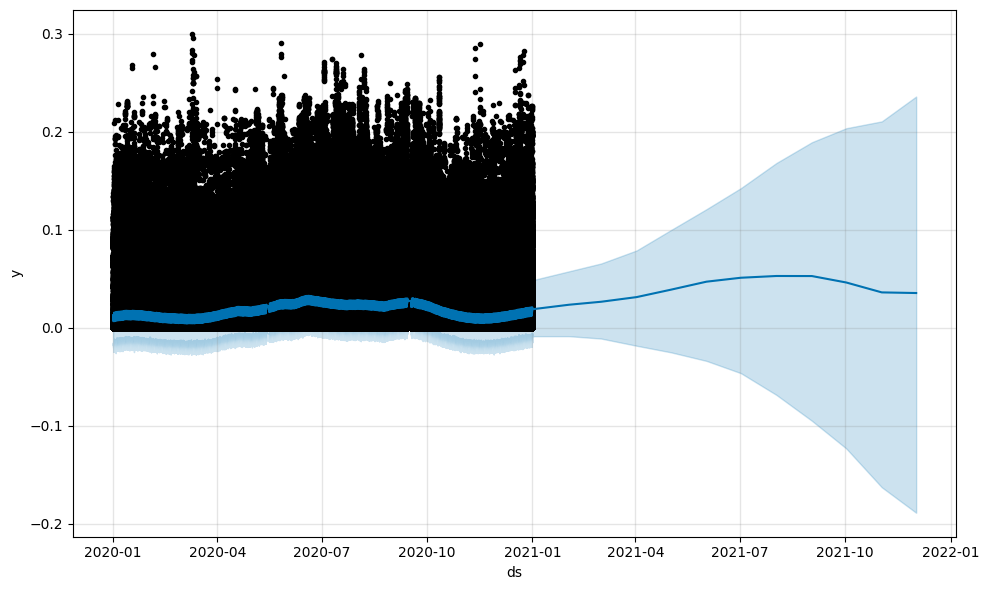

In [16]:
fig = model.plot(forecast)
plt.show()

In [17]:
# Assuming df has columns 'ds' and 'y'
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df_forecast = df_prophet.merge(forecast, on='ds', how='left')


In [18]:
# Create a comparison dataframe
comparison_df = df_forecast[['ds', 'y', 'yhat']]

# Rename columns for clarity
comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'}, inplace=True)

# Calculate the difference between actual and predicted values
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']


C:\Users\chinm\AppData\Local\Temp\ipykernel_21184\2434246373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'}, inplace=True)
C:\Users\chinm\AppData\Local\Temp\ipykernel_21184\2434246373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']


In [19]:
print(comparison_df)


                         ds  Actual  Predicted  Difference
0       2020-01-01 00:00:00   0.002   0.012929   -0.010929
1       2020-01-01 00:03:00   0.001   0.012860   -0.011860
2       2020-01-01 00:06:00   0.001   0.012792   -0.011792
3       2020-01-01 00:09:00   0.001   0.012725   -0.011725
4       2020-01-01 00:12:00   0.002   0.012659   -0.010659
...                     ...     ...        ...         ...
6627355 2020-12-31 23:45:00   0.000   0.018869   -0.018869
6627356 2020-12-31 23:48:00   0.000   0.018798   -0.018798
6627357 2020-12-31 23:51:00   0.000   0.018727   -0.018727
6627358 2020-12-31 23:54:00   0.000   0.018657   -0.018657
6627359 2020-12-31 23:57:00   0.000   0.018587   -0.018587

[6627360 rows x 4 columns]


C:\Users\chinm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


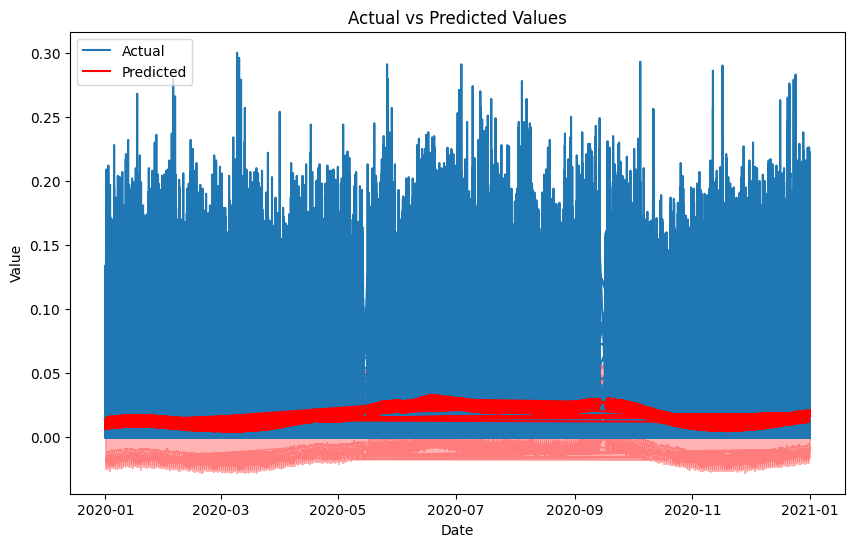

In [20]:
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(10, 6))
plt.plot(df_forecast['ds'], df_forecast['y'], label='Actual')

# Plot predicted values
plt.plot(df_forecast['ds'], df_forecast['yhat'], label='Predicted', color='red')

# Optionally, add confidence intervals
plt.fill_between(df_forecast['ds'], df_forecast['yhat_lower'], df_forecast['yhat_upper'], color='red', alpha=0.3)

# Customize plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [22]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\chinm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import joblib

In [24]:
joblib.dump(model, 'prophet_model.pkl')

['prophet_model.pkl']